# 使用最小二乘法拟合曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$
拟合出函数$h(x)$
有误差，即残差：$r_i=h(x_i)-y_i$

此时$L_2$范数(残差平方和)最小时，表示$h(x)$ 和 $y$ 相似度最高，拟合效果最好。

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

# Analytic solution to normal equation

解析解也称为闭式解（closed-form solution）. 

Normal equation: 正规方程。

问题描述：用线性模型拟合一个观测数据集。

记数据集为{X,y}。机器学习领域中用矩阵 𝑋 表示数据集时，通常是一行表示一个数据样本向量。矩阵X的大小为(n,m)，n表述数据集中数据样本数，m表示数据样本向量的维度数（或者说特征数）。

考虑用模型𝑦=𝑋𝑤+𝑏来进行拟合，即求解最优参数{w,b}使得拟合误差最小化。

考虑均方误差作为拟合误差时，可以求得该拟合问题的解析解。

注意，在机器学习领域通常将w和b分开来写，但是在求解闭式解时为了描述的简单化，通常将原始X通过追加一列（通常是最右列）全1得到其扩展版X_ext（等价于追加一个固定的feature），这样以上模型修改为𝑦=𝑋𝑤。原来的b变为w的一项（对应于X的最右边追加一列全1的话，b-->w\[0\]）。

由此可得该拟合问题的解析解为：

$ y = Xw $

$ w^* = {(X^T  X)^{-1}}@(X^T  y) $

## 例1. 一元线性拟合

可以理解为数据只有一个feature。

$y = w*x + b$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
## Design Matrix
x = np.arange(-7, 7, 0.01)
w_true = 2.5
b_true = 1.0
y = w_true * x + b_true + np.random.randn(len(x))


[1.00457171 2.50045109] [1.0, 2.5]


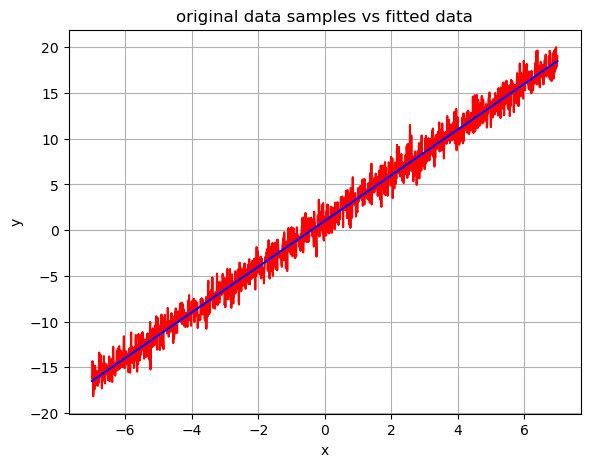

In [15]:
M = 1
X = np.zeros((len(x),M+1))
X[:,0] = 1
X[:,1] = x
w_ls = np.linalg.inv(X.T@X) @ (X.T @ y)
print(w_ls, [b_true, w_true])

y_fit = X@w_ls

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')
axes.plot(x, y_fit, 'b')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('original data samples vs fitted data')
axes.grid()
plt.show()

## 例2. 多元线性拟合

对应于数据多个features的情况

$y=b+w_1x_1+w_2x_2+...w_nx_n$

In [35]:
import numpy as np
## Design Matrix
M = 3
X = np.random.randn(100,M)
w_true = np.random.randn(M,1)
b_true = np.random.randn()

y = X@w_true + b_true + np.random.randn(X.shape[0],1)

X_ext = np.concatenate((np.ones((100,1)),X),axis=1)

w_ls = np.linalg.inv(X_ext.T@X_ext) @ (X_ext.T @ y)
print("estimation = {0}; \nground truth = {1},{2}".format(w_ls.T, b_true,np.squeeze(w_true)))

error = y - X_ext @ w_ls
loss_mse = np.mean(error * error)
print("MSE loss = {0}".format(loss_mse))

estimation = [[-0.18325175  1.28488067 -0.81901094  0.80007537]]; 
ground truth = -0.294714353940746,[ 1.28454909 -0.74627493  0.96966286]
MSE loss = 0.7736316766583385


## 例3. 高次函数的多项式拟合

其实仍然是线性拟合，用线性模型来拟合高次函数。

estimation = [ 0.66865669 -0.75611319 -0.39016095  0.38637624]; 
ground truth = 0.3396476974284565,[-0.75666452 -0.38116749  0.3839915 ]
MSE loss = 100.36114969502083


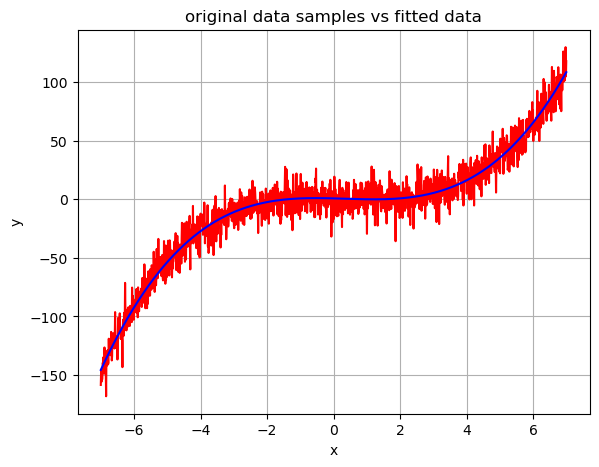

In [41]:
import numpy as np
## Design Matrix
M = 3
x = np.arange(-7, 7, 0.01)
w_true = np.random.randn(3,1)
b_true = np.random.randn()
y = b_true + w_true[0]*x + w_true[1]*x**2 + w_true[2]*x**3 + np.random.randn(len(x)) * 10

X = np.zeros((len(x),M+1))
X[:,0] = 1
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3

w_ls = np.linalg.inv(X.T@X) @ (X.T @ y)

y_fit = X@w_ls

print("estimation = {0}; \nground truth = {1},{2}".format(w_ls.T, b_true,np.squeeze(w_true)))

error = y - y_fit
loss_mse = np.mean(error * error)
print("MSE loss = {0}".format(loss_mse))


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')
axes.plot(x, y_fit, 'b')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('original data samples vs fitted data')
axes.grid()
plt.show()

In [135]:
## 2. Function packaging with 'M' as hyper-parameter 
def direct_ls(x,y,M=3):
    X = np.zeros((len(x),M+1))
    for k in range(M+1):
        X[:,k] = x**k

    w_ls = np.linalg.inv(X.T@X) @ (X.T @ y)
    
    print("M = ",M)
    print("w_ls = {0}".format(w_ls.T))
    error = y - X @ w_ls
    loss_mse = np.mean(error * error)
    print("MSE loss = {0}".format(loss_mse))
    
    return

In [136]:
#print('M = ',M,': ',direct_ls(x,y,3))
#print('M = ',M,': ',direct_ls(x,y,6))
#print('M = ',M,': ',direct_ls(x,y,9))
direct_ls(x,y,3)
direct_ls(x,y,6)
direct_ls(x,y,9)

M =  3
w_ls = [-1.48538902e-02  1.01083423e+01 -3.07115620e+01  2.06987180e+01]
MSE loss = 0.0239195740220663
M =  6
w_ls = [ 1.44687956e-01 -2.05010292e+00  6.90133072e+01 -2.74658408e+02
  3.90536685e+02 -2.29868270e+02  4.69413311e+01]
MSE loss = 0.002402462414628715
M =  9
w_ls = [ 1.46287129e-01 -7.75732855e+01  1.80357735e+03 -1.58081839e+04
  7.29689121e+04 -1.96998085e+05  3.20871866e+05 -3.10037940e+05
  1.63516871e+05 -3.62395322e+04]
MSE loss = 5.495150974798716e-09


## 例4：多项式拟合任意函数

本例中，我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音项，用多项式去拟合。

numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$，换句话说，numpy.poly1d的输入参数表示多项式系数，按降序排列

In [3]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)


In [5]:
N = 10
np.random.seed(1) # set the random seed to make the running result reproducible.
x = np.linspace(0, 1, N)
# x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

y = real_func(x) + np.random.normal(0, 0.1, (N,))

estimation = [-6.31074252e-02  4.28889705e+00  2.13404974e+01 -1.21951231e+02
  1.57234701e+02 -6.08562506e+01]; 
ground truth = -0.34498721015497946,[ 0.67471153  0.61853913 -0.44317193  1.81053491 -1.30572692]
MSE loss = 0.013420622266186141


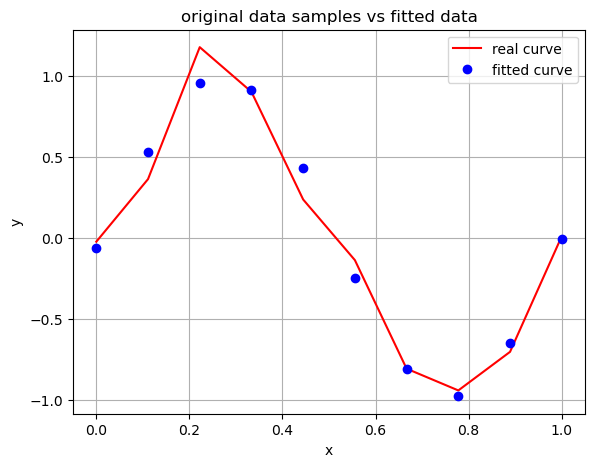

In [22]:
## Design Matrix
M = 5
w_true = np.random.randn(M,1)
b_true = np.random.randn()
# y = b_true + w_true[0]*x + w_true[1]*x**2 + w_true[2]*x**3 + np.random.randn(len(x)) * 0.1
y = real_func(x) + np.random.randn(len(x)) * 0.1

X = np.zeros((len(x),M+1))
for k in range(M+1):
    X[:,k] = x**k
    
w_ls = np.linalg.inv(X.T@X) @ (X.T @ y)

y_fit = X@w_ls

print("estimation = {0}; \nground truth = {1},{2}".format(w_ls.T, b_true,np.squeeze(w_true)))

error = y - y_fit
loss_mse = np.mean(error * error)
print("MSE loss = {0}".format(loss_mse))


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r', label = 'real curve') # label, instead of legend!
axes.plot(x, y_fit, 'bo', label = 'fitted curve')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('original data samples vs fitted data')
axes.grid()
axes.legend()
plt.show()

## 用scipy.optimize.leastsq() 求解

scipy.optimize.leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)[source]  

Minimize the sum of squares of a set of equations.用于优化（最小化）一个方程组的平方和。  

func: 待优化的函数，在本例中就是误差函数--residual = f(X) - y.  

x0: 待优化函数的参数的初始值。在本例中就是多项式的系数，函数func代表的是多项式，它决定于多项式系数p。优化的目标就是要找到最优的多项式系数使得func(X,y)的平方和最小.  

args=(): func()的额外的参数,在本例中就是输入数据样本及其对应的参考输出。  

所以要利用scipy的leastsq来求解least-square fitting/estimation/optimization问题，首先要定义代表残留误差的函数。


In [107]:
# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [118]:
def scipy_leastsq_fitting(x, y, M=0):
    """    
    M    为用于拟合的多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    error = residuals_func(p_lsq[0], x, y)
    mse_loss = np.mean(error * error)
    print('Fitting Parameters:', p_lsq[0])
    print('MSE loss = ', mse_loss)

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real func curve (ground truth)')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='data with noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.01695883]
MSE loss =  0.45550917927494733


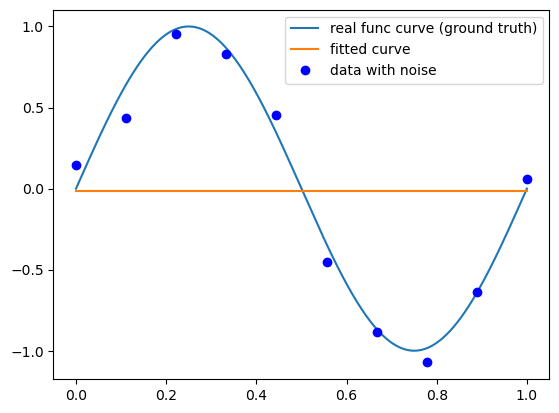

In [119]:
# M=0
p_lsq_0 = scipy_leastsq_fitting(x,y,M=0)

Fitting Parameters: [-1.33552425  0.65080329]
MSE loss =  0.2738436723329072


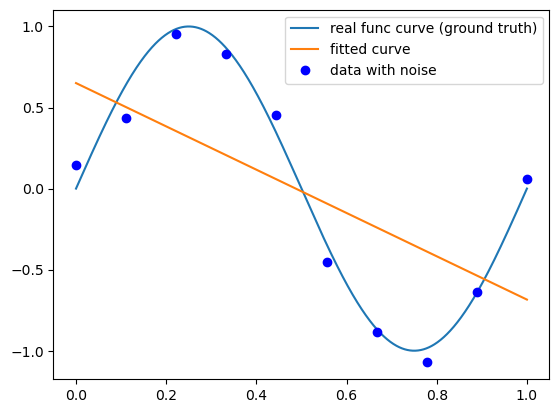

In [120]:
# M=1
p_lsq_1 = scipy_leastsq_fitting(x,y,M=1)

Fitting Parameters: [ 2.06987179e+01 -3.07115619e+01  1.01083422e+01 -1.48538961e-02]
MSE loss =  0.02391957402206623


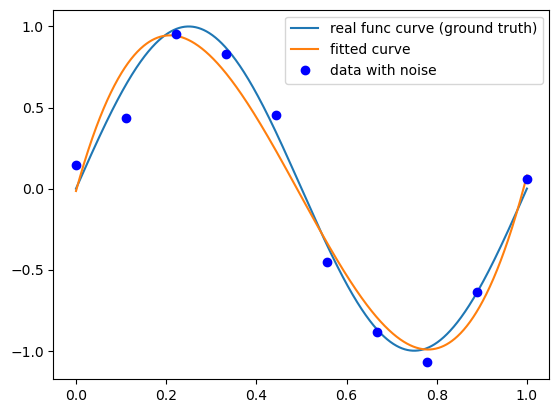

In [121]:
# M=3
p_lsq_3 = scipy_leastsq_fitting(x,y,M=3)

Fitting Parameters: [-3.62290799e+04  1.63469692e+05 -3.09948459e+05  3.20779255e+05
 -1.96941283e+05  7.29479617e+04 -1.58036978e+04  1.80307344e+03
 -7.75504164e+01  1.46210794e-01]
MSE loss =  9.149574532779739e-23


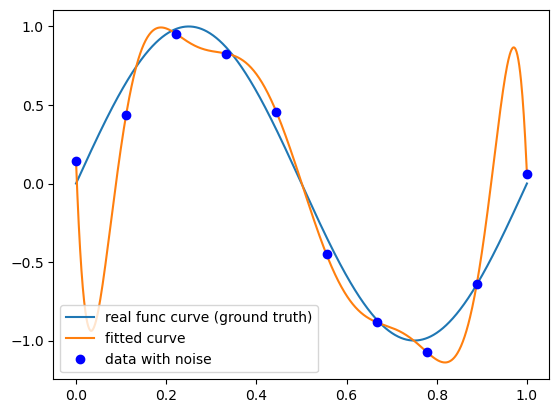

In [122]:
# M=9
p_lsq_9 = scipy_leastsq_fitting(x,y,M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

## 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$L_w(x)=\frac{1}{n}\sum_{i=1}^n(f(x_i)-y_i)^2+\frac{1}{2}\lambda||w||^2$。

线性回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。上式中采用的是L2正则化。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [128]:
def residuals_func_regularization(p, x, y, reg_factor = 0.001):
    ret = fit_func(p, x) - y
    ret = np.append(ret, 
                    np.sqrt(0.5 * reg_factor * np.square(p)))  # L2范数作为正则化项
    return ret

In [131]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

error = residuals_func(p_lsq_regularization[0], x, y)
mse_loss = np.mean(error * error)
print('Fitting Parameters:', p_lsq_regularization[0])
print('MSE loss = ', mse_loss)

Fitting Parameters: [ -5.46146543  -0.56167169   3.52372987   5.96679037   5.64176009
   1.46333455  -6.07043341 -10.2525006    5.71437961   0.12720857]
MSE loss =  0.013192348837224463


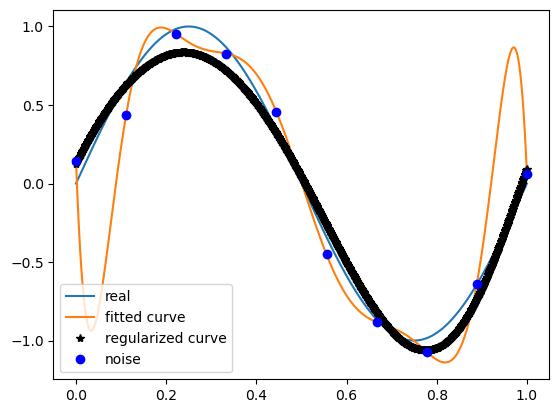

In [130]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points), 
    'k*',
    label='regularized curve')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

显然，在加入正则化处理后，虽然仍然用了9阶多项式，但是过拟合现象被抑制了。拟合误差与前面用3阶多项式拟合时的误差大致相当。